In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

dt = pd.read_csv("train.csv")
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
dt.drop(["Ticket", "Cabin", "Embarked", "Parch", "Name"], axis = 1, inplace=True)

In [3]:
print("SHAPE IS: {}".format(dt.shape))
print
print("which columns have NAN vals:")
dt.isnull().sum()

SHAPE IS: (891, 7)

which columns have NAN vals:


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Fare             0
dtype: int64

In [4]:
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,512.329200


In [5]:
dt["Age"].fillna(dt['Age'].mean(), inplace=True)

In [6]:
dt.shape

(891, 7)

In [7]:
lived = dt[dt["Survived"] == 1]
died = dt[dt["Survived"] == 0]


men_lived = lived["Sex"].value_counts()["male"]
men_died = died["Sex"].value_counts()["male"]
women_lived = lived["Sex"].value_counts()["female"]
women_died = died["Sex"].value_counts()["female"]


print("Percent Men died in overall dead people")
print (float(men_died) / float(men_died + women_died) )

print("Percent Men lived in overall dead people")
print (float(men_lived) / float(men_lived + women_lived) )

assert(men_lived + men_died + women_died + women_lived == dt.shape[0])

Percent Men died in overall dead people
0.852459016393
Percent Men lived in overall dead people
0.318713450292


Those Lived based on PClass


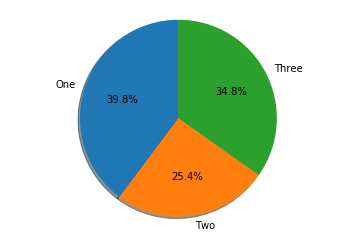

In [8]:
one_lived = float(lived["Pclass"].value_counts()[1])
one_died = float(died["Pclass"].value_counts()[1])


two_lived = float(lived["Pclass"].value_counts()[2])
two_died = float(died["Pclass"].value_counts()[2])



three_lived = float(lived["Pclass"].value_counts()[3])
three_died = float(died["Pclass"].value_counts()[3])




labels = 'One', 'Two', 'Three'
sizes = [one_lived, two_lived, three_lived]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

print("Those Lived based on PClass")

plt.show()

Those Died based on PClass


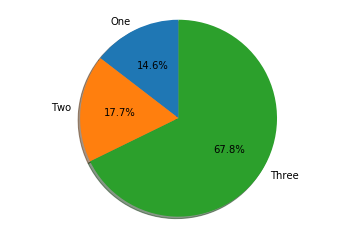

In [9]:
labels = 'One', 'Two', 'Three'
sizes = [one_died, two_died, three_died]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

print("Those Died based on PClass")

plt.show()

In [10]:
le = preprocessing.LabelEncoder()
le.fit(dt["Sex"])
dt["Sex"] = le.transform(dt["Sex"])

dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,0,3,1,22.0,1,7.2500
1,2,1,1,0,38.0,1,71.2833
2,3,1,3,0,26.0,0,7.9250
3,4,1,1,0,35.0,1,53.1000
4,5,0,3,1,35.0,0,8.0500


In [11]:
age = dt["Age"]
categorical_age = []
for x in age:
    if x < 14:
        categorical_age.append(0)
    elif x >= 65:
        categorical_age.append(2)
    else:
        categorical_age.append(1)
dt["Age"] = categorical_age
dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,0,3,1,1,1,7.2500
1,2,1,1,0,1,1,71.2833
2,3,1,3,0,1,0,7.9250
3,4,1,1,0,1,1,53.1000
4,5,0,3,1,1,0,8.0500


In [12]:
age = dt["Fare"]
categorical_fare = []
for x in age:
    if x < 33:
        categorical_fare.append(0)
    else:
        categorical_fare.append(1)
dt["Fare"] = categorical_fare
dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,0,3,1,1,1,0
1,2,1,1,0,1,1,1
2,3,1,3,0,1,0,0
3,4,1,1,0,1,1,1
4,5,0,3,1,1,0,0


In [13]:
Y = dt["Survived"]
X = dt.drop(["PassengerId", "Survived"], axis = 1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.32)


In [15]:
clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
print "Prediction accuracy on test set:"
clf.score(X_test, y_test) 

Prediction accuracy on test set:


0.83916083916083917